# Haberman dataset EDA


#  Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

# Basic Terminology
Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999


Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

**Attribute Information:**

**1) Age = Age of patient at time of operation (numerical)**

**2) Year = Patient's year of operation (year - 1900, numerical)**

**3) Nodes = Number of positive axillary nodes detected (numerical)**

**4) Status = Survival status (class attribute)**
* **1(Yes) = the patient survived 5 years or longer**
* **2(No) = the patient died within 5 year**

**Missing Attribute Values: None**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
# to ignore and hide warnings while executing the code
warnings.filterwarnings('ignore');

In [3]:
haberman = pd.read_csv("haberman.csv")

In [4]:
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [5]:
haberman.status=haberman.status.map({1:"Yes",2:"No"})


In [6]:
print(haberman.head())

   age  year  nodes status
0   30    64      1    Yes
1   30    62      3    Yes
2   30    65      0    Yes
3   31    59      2    Yes
4   31    65      4    Yes


In [7]:
## shape of the dataset.

print(haberman.shape)

(306, 4)


In [8]:
## No. of features in dataset.

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Patient status

* Yes = the patient survived 5 years or longer.
* No  = the patient died within 5 year.

In [10]:
## No. of data-point per class.

print(haberman['status'].value_counts())

Yes    225
No      81
Name: status, dtype: int64


<AxesSubplot:xlabel='status', ylabel='count'>

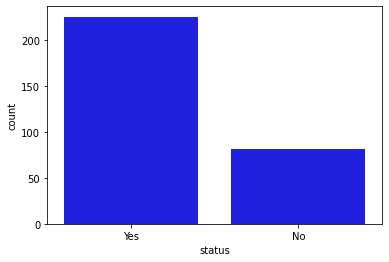

In [11]:
sns.countplot(haberman['status'],color='blue')

# Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)

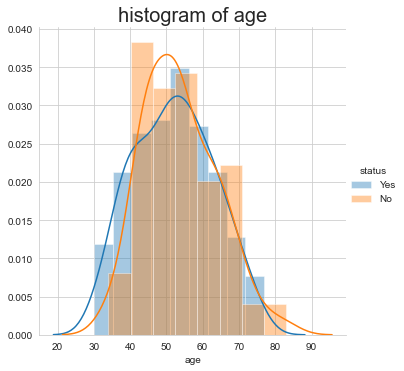

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'age')\
   .add_legend();
plt.title('histogram of age',fontsize='20')
plt.show()

**observation**

There is alot of overlapping between 2 pdf no clear separation between 2 classes. 
* patient in age bracket 30 to 40 have more chances of survival .
* patient in age bracket 40-50 have less chance of survival. 
* age bracket 65-70 has lower probablity to survival.
* No specific relation between age and survival of patient.

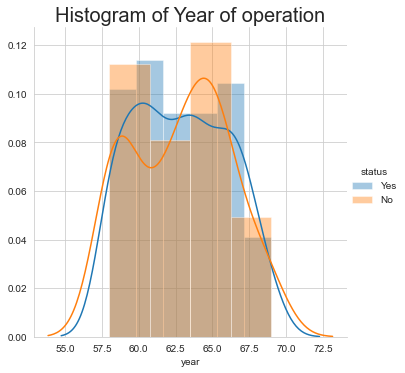

In [13]:
plt.close()
sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'year').add_legend();
plt.title('Histogram of Year of operation',fontsize='20')
plt.show()

**observation**

This feature again doesn't offer any clear separation. also the 2 pdf are overlapping like crazy.
* the time between 1963-1966 not good for operation. althougth it is expected that with passage of time and development of medical science. survival rate should be go up.but no such clear trend is observed.   

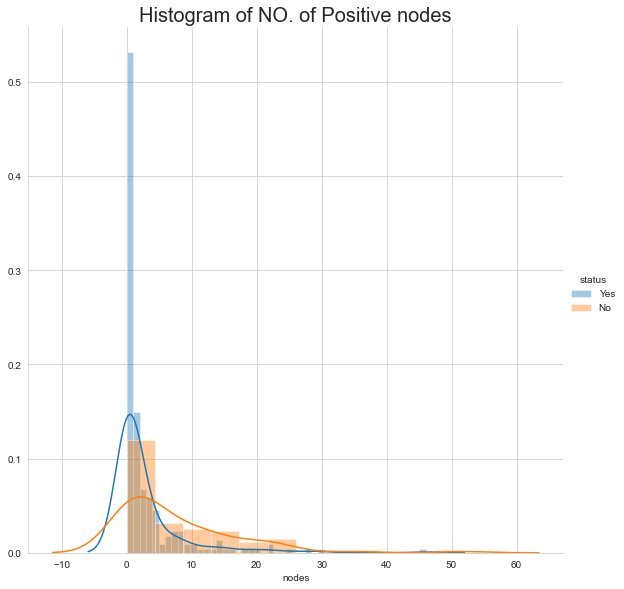

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',size=8)\
   .map(sns.distplot,'nodes')\
   .add_legend();
plt.title('Histogram of NO. of Positive nodes',fontsize='20');
plt.show();

**observation**

There is lot of overlapping between two pdf. no clear separation again.following conclusion can be drawn.

* For nodes < 2 have more chance to survival
* for nodes lying between 2 to 4 have less of survival
* For nodes lying betwwen 4 to 5 have more chance of survival
* For nodes > 5 have less chances of survival

#  CDF

In [15]:
survived=haberman.loc[haberman['status']=='Yes'];
not_survived=haberman.loc[haberman['status']=='No'];


In [16]:
survived

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
...,...,...,...,...
298,73,68,0,Yes
300,74,63,0,Yes
301,75,62,1,Yes
302,76,67,0,Yes


In [17]:
## calculate cdf for patients nodes
# survived
count,bins_edges_nodes_survived = np.histogram(survived['nodes'] ,bins=8, density=True)
pdf= count/(sum(count))
cdf_nodes_survived=np.cumsum(pdf)

# not survived 
count,bins_edges_nodes_not_survived = np.histogram(not_survived['nodes'] ,bins=8, density=True)
pdf= count/(sum(count))
cdf_nodes_not_survived=np.cumsum(pdf)



## calculate cdf for patients age
# survived 
count,bins_edges_age_survived = np.histogram(survived['age'] ,bins=8, density=True)
pdf= count/(sum(count))
cdf_age_survived=np.cumsum(pdf)

# not survived 
count,bins_edges_age_not_survived = np.histogram(not_survived['age'] ,bins=8, density=True)
pdf= count/(sum(count))
cdf_age_not_survived=np.cumsum(pdf)




## calculate cdf for patients year of operation
# survived 
count,bins_edges_year_survived = np.histogram(survived['year'] ,bins=8, density=True)
pdf= count/(sum(count))
cdf_year_survived=np.cumsum(pdf)

# not survived 
count,bins_edges_year_not_survived = np.histogram(not_survived['year'] ,bins=8, density=True)
pdf= count/(sum(count))
cdf_year_not_survived=np.cumsum(pdf)



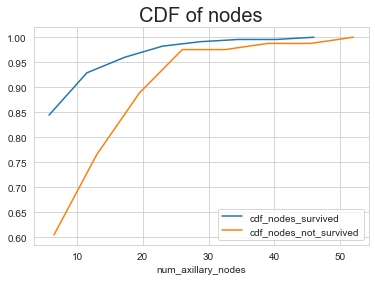

percentile
[25% 50% 75% 90% 95% 100%]
**********************
[ 0.  0.  3.  8. 14. 46.]
[ 1.  4. 11. 20. 23. 52.]


In [18]:
plt.plot(bins_edges_nodes_survived[1:],cdf_nodes_survived,label='cdf_nodes_survived')
plt.plot(bins_edges_nodes_not_survived[1:],cdf_nodes_not_survived,label='cdf_nodes_not_survived')
plt.legend()
plt.xlabel('num_axillary_nodes')
plt.title('CDF of nodes',fontsize='20')
plt.show()

#percentile
#percentile
print('percentile\n[25% 50% 75% 90% 95% 100%]\n**********************')
print(np.percentile(survived['nodes'], [25,50,75, 90, 95,100]))
print(np.percentile(not_survived['nodes'], [25,50,75, 90, 95,100]))

**observation**
* 95% of patient who survuived had less than 14 nodes.
* 95% of patient who did not survive had less than 23 nodes.
* this indcate higer the number of positive nodes less the chance of survivals

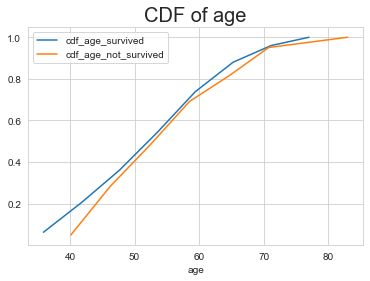

percentile
[25% 50% 75% 90% 95% 100%]
**********************
[43. 52. 60. 67. 70. 77.]
[46. 53. 61. 67. 70. 83.]


In [19]:
plt.plot(bins_edges_age_survived[1:],cdf_age_survived,label='cdf_age_survived')
plt.plot(bins_edges_age_not_survived[1:],cdf_age_not_survived,label='cdf_age_not_survived')
plt.legend()
plt.xlabel('age')
plt.title('CDF of age',fontsize='20')
plt.show()

#percentile
print('percentile\n[25% 50% 75% 90% 95% 100%]\n**********************')
print(np.percentile(survived['age'], [25,50,75, 90, 95,100]))
print(np.percentile(not_survived['age'], [25,50,75, 90, 95,100]))

**observation**

* In age group above 50, age of survived or not not survived patient are identical. hence no prediction can be made about suvival status.

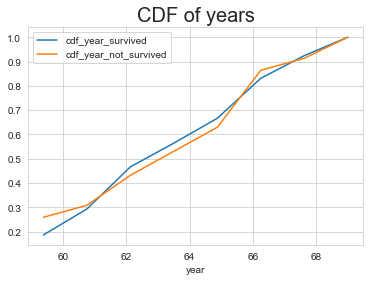

percentile
[25% 50% 75% 90% 95% 100%]
**********************
[60. 63. 66. 67. 68. 69.]
[59. 63. 65. 67. 68. 69.]


In [20]:
plt.plot(bins_edges_year_survived[1:],cdf_year_survived,label='cdf_year_survived')
plt.plot(bins_edges_year_not_survived[1:],cdf_year_not_survived,label='cdf_year_not_survived')
plt.legend()
plt.xlabel('year')
plt.title('CDF of years',fontsize='20')
plt.show()

#percentile
#percentile
print('percentile\n[25% 50% 75% 90% 95% 100%]\n**********************')
print(np.percentile(survived['year'], [25,50,75, 90, 95,100]))
print(np.percentile(not_survived['year'], [25,50,75, 90, 95,100]))

**observation**
* This feature is not good for prediction clearly visible percentile value not differing very much, hence this feature will not be considered for further analysis.

# Boxplot and whiskers

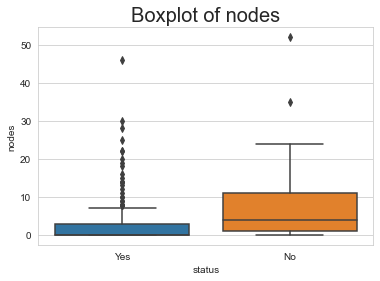

In [27]:
sns.boxplot(x='status',y='nodes',data=haberman);
plt.title('Boxplot of nodes',fontsize='20')
plt.show()

**observation**

* almost all survived sujbect have less then 10 positive nodes. and almost all non survived subject have less then 25 positive nodes
* 75% value of survived subject have less than 3 nodes and 50% value of non survived subject have value less than 4 nodes and 50% non survived subject have more than 4 positive nodes 

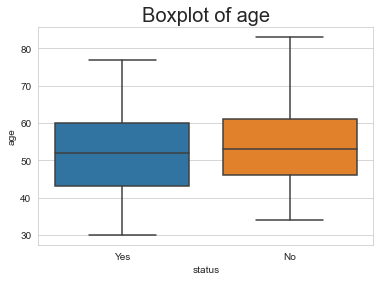

In [28]:
sns.boxplot(x='status',y='age',data=haberman);
plt.title('Boxplot of age',fontsize='20')
plt.show()

**observation**

* 25% 50% 75% value of both classes are almost identical. hence no prediction can be made sbout survival status on the base of only age.

# Violin Plot 

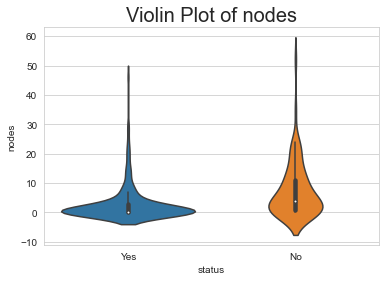

In [40]:
sns.violinplot(x='status',y='nodes',data=haberman,size=8);
plt.title('Violin Plot of nodes',fontsize='20')
plt.show()

**observation**

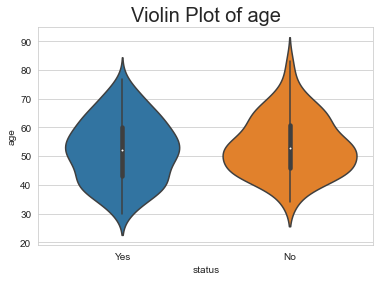

In [37]:
sns.violinplot(x='status',y='age',data=haberman,size=8);
plt.title('Violin Plot of age',fontsize='20')
plt.show()

# Pair Plot

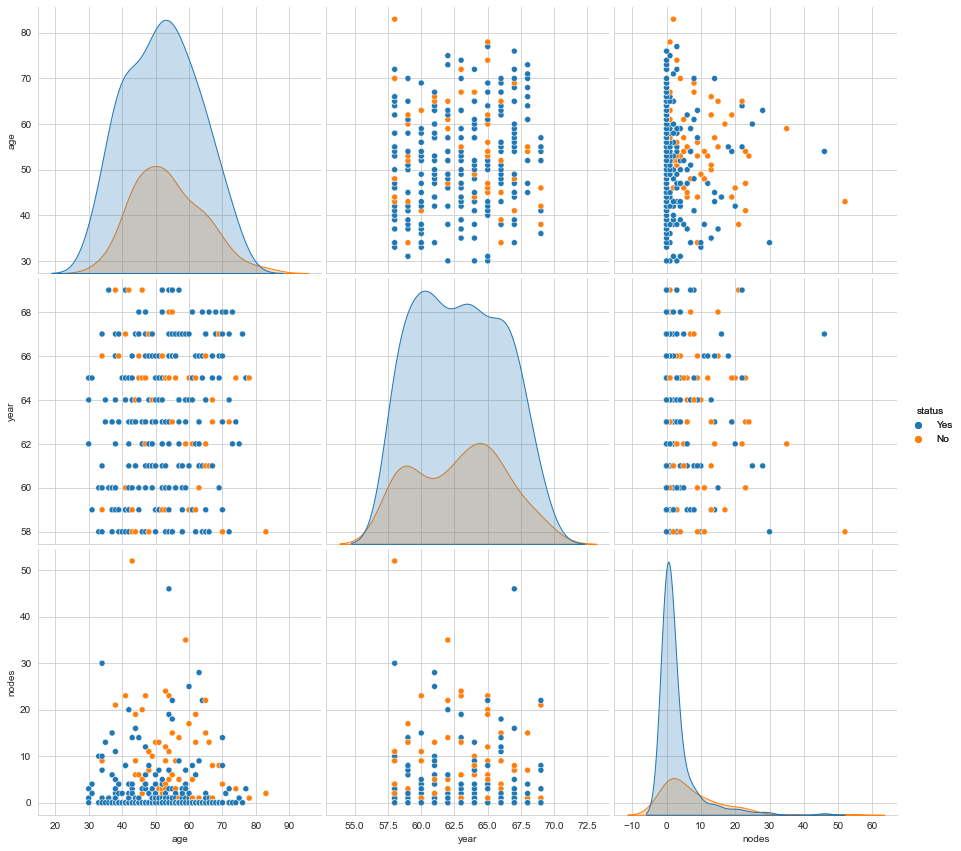

In [23]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue='status',height=4)\
   .add_legend();
plt.show();

# 2-D scatter plot.

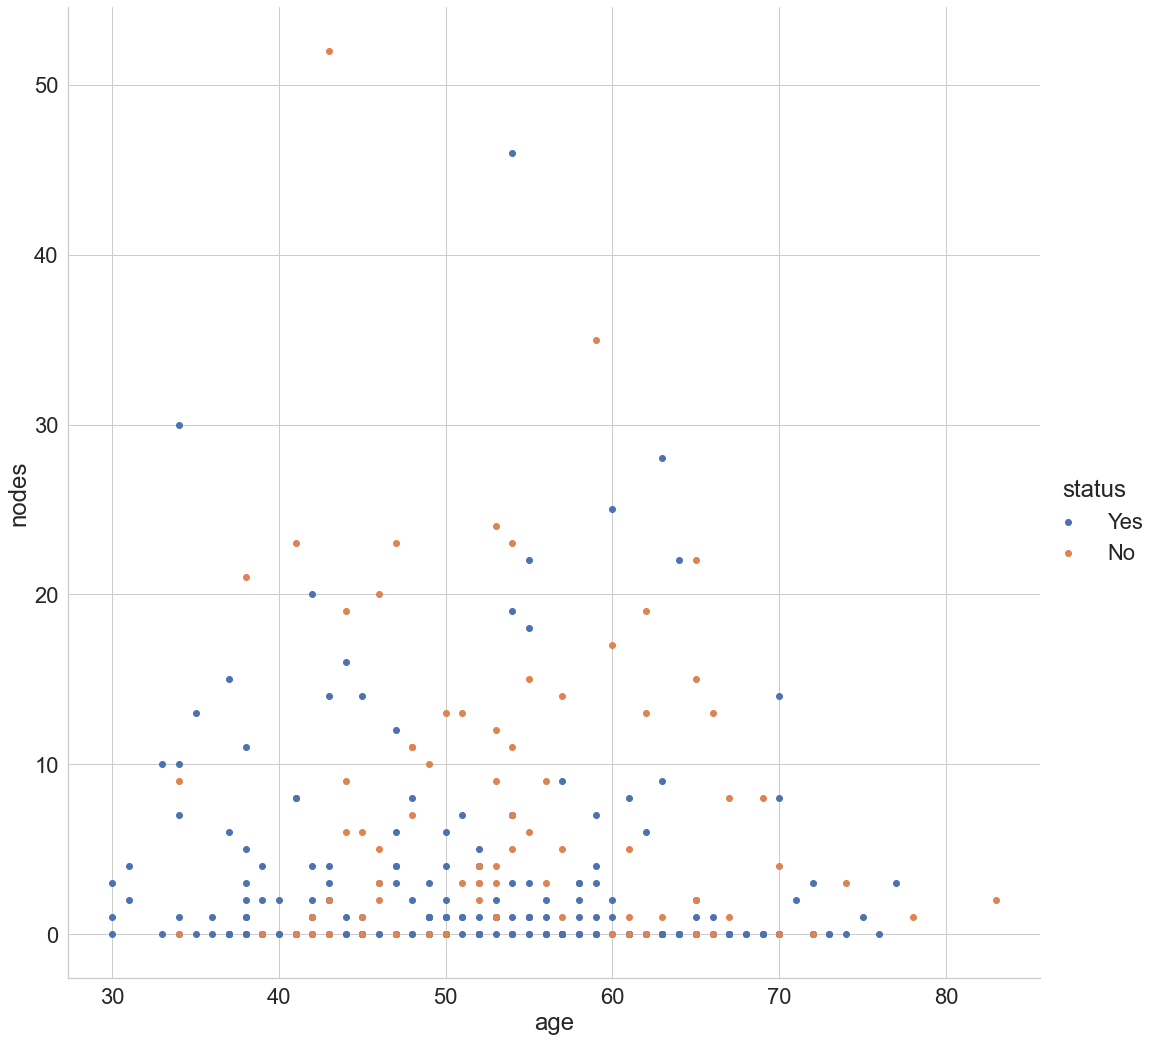

In [59]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue="status",height=15)\
    .map(plt.scatter,'age','nodes')\
    .add_legend();
sns.set(font_scale=3)
plt.show();

**observation**
* From univariate analysis these 2 feature age and number of positive nodes are good for bivariate analysis.
* In age group between 30 -40 only four subject are not survived.
* Another survivor cluster in age group between 50-60 having nodes is less than 4.


# Conclusion

The order of relevence between three feature is number of positive nodes > age > year of operation